## [Matpotlib의 상자수염(Boxplot) 그래프]
- 데이터의 분포 체크 및 이상치 체크
- 이상치/패턴 파악 가능함


In [ ]:
## 모듈 로딩
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

In [ ]:
## 데이터 준비
D_file = '../Data/auto_mpg.csv'

autoDF=pd.read_csv(D_file)
autoDF.head(3)

In [ ]:
## 시각화 
## ------------------------------------------------
## 기본 박스 플롯
## ------------------------------------------------

## 그래프 생성
plt.boxplot(autoDF['mpg'], label='mpg')

## 공통부분
plt.title('mpg 컬럼 분포 및 이상치 테크')

## 그래프 화면 출력
plt.show()

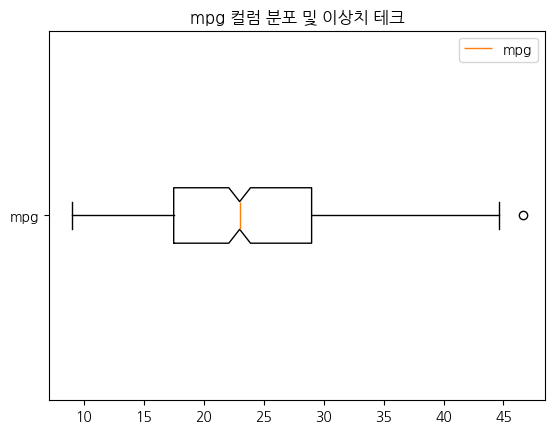

In [15]:
## ------------------------------------------------
## 노치, 수평 박스 그래프
## => notch 매개변수 : True
## => vert  매개변수 : False
## ------------------------------------------------

## 그래프 생성
plt.boxplot(autoDF['mpg'], label='mpg', vert=False, notch=True)

## 공통부분
plt.title('mpg 컬럼 분포 및 이상치 테크')
plt.yticks([1], ['mpg'])
plt.legend()

## 그래프 화면 출력
plt.show()

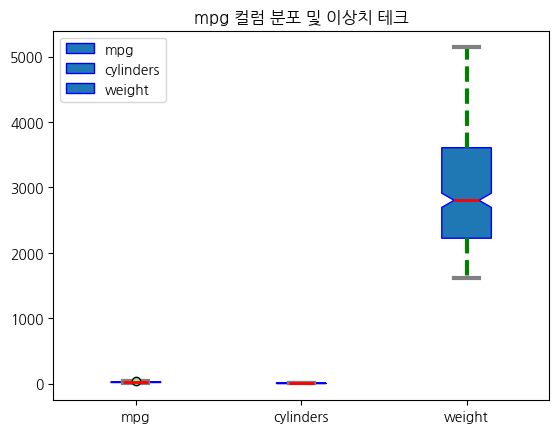

In [20]:
## ------------------------------------------------
## 여러개 컬럼의 박스그래프
## => notch 매개변수 : True
## => vert  매개변수 : False
## ------------------------------------------------
## 기본 박스 플롯
data_name = ['mpg', 'cylinders', 'weight']

## 그래프 생성
plt.boxplot(autoDF[data_name], 
            label=data_name, 
            notch=True,
            ## 박스 안쪽 여백색상설정
            patch_artist=True, 
            ## 이상치 설정
            flierprops=dict(markerfacecolor='lightgreen'),
            ## Q1과 최소값, Q3와 최대값 잇는 선설정
            whiskerprops=dict(color='green', linewidth=3, linestyle='--'),
            ## 최상단, 최하단 선과 직사각형을 잇는선테두리컬러
            capprops=dict(color='gray', linewidth=3), 
            ## 중앙값 설정
            medianprops=dict(color='red',linewidth=2),
            ## IQR 설정
            boxprops=dict(color='blue')
)

## 공통부분
plt.title('mpg 컬럼 분포 및 이상치 테크')
plt.xticks([1,2,3], data_name)
plt.legend()

## 그래프 화면 출력
plt.show()

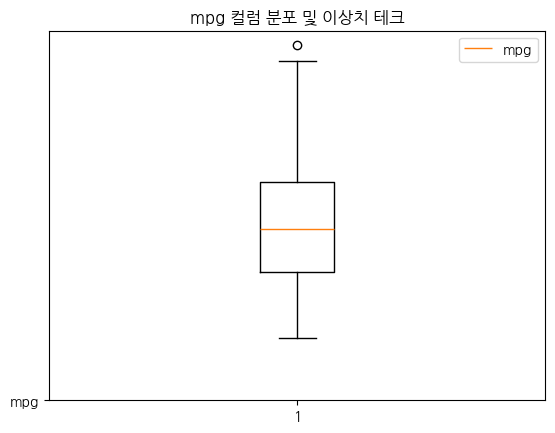

In [21]:
## ------------------------------------------------
## 박스 플롯에서 이상치 값 추출
## ------------------------------------------------
## 그래프 생성
boxDict = plt.boxplot(autoDF['mpg'], label='mpg')

## 공통부분
plt.title('mpg 컬럼 분포 및 이상치 테크')
plt.yticks([1], ['mpg'])
plt.legend()



## 그래프 화면 출력
plt.show()

In [34]:
## => 박스플롯의 시각화 결과 값 : dict 타입
for key in boxDict :
    print(key, len(boxDict[key]))
    for line in boxDict[key] :
        print(f'==> {line.get_ydata()}')
    print()
    



whiskers 2
==> [17.5  9. ]
==> [29.  44.6]

caps 2
==> [9. 9.]
==> [44.6 44.6]

boxes 1
==> [17.5 17.5 29.  29.  17.5]

medians 1
==> [23. 23.]

fliers 1
==> [46.6]

means 0



In [35]:
## => 이상치 값 추출
outlier_v = boxDict['fliers'][0].get_ydata()

autoDF['mpg'].value_counts()[outlier_v]

mpg
46.6    1
Name: count, dtype: int64